<a href="https://colab.research.google.com/github/scaairesearch/da_cv_fer/blob/main/evaluate_fer_sai_EXPWCrop.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [41]:
!git clone https://github.com/scaairesearch/da_cv_fer.git
import os
os.getcwd()
os.chdir('da_cv_fer')

Cloning into 'da_cv_fer'...
remote: Enumerating objects: 289, done.
remote: Counting objects: 100% (80/80), done.
remote: Compressing objects: 100% (48/48), done.
remote: Total 289 (delta 38), reused 66 (delta 32), pack-reused 209
Receiving objects: 100% (289/289), 15.65 MiB | 18.35 MiB/s, done.
Resolving deltas: 100% (152/152), done.


In [22]:
!pip install -q -r requirements.txt # -q is for quiet install
!pip install -q opendatasets # quient install, for some reason this does not get installed with requirements

ERROR: Could not find a version that satisfies the requirement pywin32==306 (from versions: none)
ERROR: No matching distribution found for pywin32==306


In [23]:
!pip install facenet_pytorch

In [24]:
from pathlib import Path
from da_cv_fer.data_config import DataConfig
from da_cv_fer.ds_sfew import DatasetSFEW
from da_cv_fer.ds_sfew_crop import DatasetSFEWCROP
from da_cv_fer.ds_expw import EXPW
from da_cv_fer.ds_expw_crop import EXPWCROP
from da_cv_fer.utils import show_batch
from da_cv_fer.model_DANN import DANN
from da_cv_fer.run_config import RunConfig
from da_cv_fer.train import (weights_init,
                             train_model,
                             get_correct_predictions,
                             test_model)
from da_cv_fer.model_DANN_Bespoke import DANNBespoke
import os
import torch
import pandas as pd
import numpy as np
from torch.utils.data import Dataset, random_split, DataLoader
from torchvision.datasets import ImageFolder
from PIL import Image
from torchvision.models import resnet50, ResNet50_Weights
import torchvision.models as models
import matplotlib.pyplot as plt
from torchvision.transforms import ToTensor
import torchvision.transforms as tt
from sklearn.metrics import f1_score
import torch.nn.functional as F
import torch.nn as nn
from torchvision.utils import make_grid
import random
import shutil
import tarfile
import cv2
import time
import os
import math
from datetime import datetime
import warnings
warnings.filterwarnings("ignore")
from facenet_pytorch import MTCNN
from zipfile import ZipFile

In [25]:
# Mounting Google drive
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [26]:
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
print(device)

cuda


### Creating a cropped dataset

Commented out since  cropped dataset has already been saved in Drive

In [27]:
# def create_annotated_cropped_ds():
#   mtcnn = MTCNN(image_size=224,device=device)


In [28]:
# mtcnn = MTCNN(image_size=224,device=device)

In [29]:
# #define paths for extraction

# dataconfig = DataConfig()
# EXPW_RACEDS_BASE_PATH = "/content/gdrive/MyDrive/CV_FER/dataset"
# EXPW_RACEDS_EXTRACT_PATH = "/content/gdrive/MyDrive/CV_FER/dataset/RaceTest_EXPW"
# EXPW_RACEDS_ZIP_FILE_PATH = "/content/gdrive/MyDrive/CV_FER/dataset"
# EXPW_RACEDS_labels = ['angry','disgust','fear','happy','neutral','sad','surprise']

# EXPWCrop_RACEDS_IMPATH = "/content/gdrive/MyDrive/CV_FER/dataset/RaceTest_EXPWCrop"

# labels_map={"0":"Angry",
# "1":"Disgust",
# "2":"Fear",
# "3":"Happy",
# "4":"Sad",
# "5":"Surprise",
# "6":"Neutral"}

# labels_map2={"Angry":"0",
# "Disgust": "1",
# "Fear":"2",
# "Happy":"3",
# "Sad":"4",
# "Surprise":"5",
# "Neutral":"6"}

# labels=list(labels_map.values())

# EXPW_RACEDS_dict_dataset = {'TEST_DIR' : EXPW_RACEDS_EXTRACT_PATH}

# print(f'self.BASE_PATH -{EXPW_RACEDS_BASE_PATH } | self.EXTRACT_DIR- {EXPW_RACEDS_EXTRACT_PATH} | self.ZIP_FILE_PATH - {EXPW_RACEDS_ZIP_FILE_PATH} ')

In [30]:
# #extract data EXPW

# if not (os.path.exists(EXPW_RACEDS_EXTRACT_PATH+"/"+"EXPW_annotated")):
#   try:
#       with ZipFile(Path(EXPW_RACEDS_ZIP_FILE_PATH, "EXPW_annotated.zip"), 'r') as zip:
#           zip.extractall(Path(EXPW_RACEDS_EXTRACT_PATH))
#           print("Done")
#   except Exception as e:
#       print('Failed: ', e)

In [31]:
## Cropping images

# data_list=[]
# EXPW_RACEDS_IM_PATH=EXPW_RACEDS_EXTRACT_PATH+ "/EXPW_annotated"
# EXPW_RACEDS_list=os.listdir(EXPW_RACEDS_IM_PATH)
# EXPW_RACEDS_dict={}
# EXPW_RACEDS_dict_list=[]
# races=["African", "Asian", "White", "Indian", "Middle Eastern", "Latino"]

# for i in EXPW_RACEDS_list:
#     race = os.listdir(EXPW_RACEDS_IM_PATH+"/"+i)
#     EXPW_RACEDS_dict[i] = {key: None for key in race}

# for emotion in EXPW_RACEDS_list:
#   for race in os.listdir(Path(EXPW_RACEDS_IM_PATH, emotion)):
#     if(race not in races):
#       continue
#     print(emotion, race)
#     images = os.listdir(Path(EXPW_RACEDS_IM_PATH, emotion, race))
#     img_save = Path(EXPWCrop_RACEDS_IMPATH, emotion, race)

#     for image_name in images:
#       img = Image.open(os.path.join(Path(EXPW_RACEDS_IM_PATH, emotion, race), image_name)).convert("RGB")
#       img_save_path = str(Path(img_save, image_name))
#       #print(img_save_path)
#       if(os.path.exists(img_save_path)):
#         print("passing values ", img_save_path)
#         continue
#       img_cropped = mtcnn(img, save_path = str(img_save_path))

### Initializing parameters for dataset load



In [32]:
labels_map={"0":"Angry",
"1":"Disgust",
"2":"Fear",
"3":"Happy",
"4":"Sad",
"5":"Surprise",
"6":"Neutral"}

labels_map2={"Angry":"0",
"Disgust": "1",
"Fear":"2",
"Happy":"3",
"Sad":"4",
"Surprise":"5",
"Neutral":"6"}

In [33]:
EXPWCrop_RACEDS_IMPATH = "/content/gdrive/MyDrive/CV_FER/dataset/RaceTest_EXPWCrop"
data_list=[]
EXPW_RACEDS_IM_PATH=EXPWCrop_RACEDS_IMPATH
EXPW_RACEDS_list=os.listdir(EXPW_RACEDS_IM_PATH)
EXPW_RACEDS_dict={}
EXPW_RACEDS_dict_list=[]
for i in EXPW_RACEDS_list:
    race = os.listdir(EXPW_RACEDS_IM_PATH+"/"+i)
    EXPW_RACEDS_dict[i] = {key: None for key in race}

for emotion in EXPW_RACEDS_list:
    for race in EXPW_RACEDS_dict[emotion]:
        EXPW_RACEDS_dict[emotion][race]=os.listdir(EXPW_RACEDS_IM_PATH+"/"+emotion+"/"+race)
        EXPW_RACEDS_dict_list+=[[emotion, race, i] for i in os.listdir(EXPW_RACEDS_IM_PATH+"/"+emotion+"/"+race)]

In [34]:
emotions=["Angry", "Fear", "Disgust", "Sad", "Surprise", "Neutral", "Happy"]

In [35]:
races=["African", "Asian", "White", "Indian", "Middle Eastern", "Latino"]

In [36]:
EXPW_RACEDS_dict_list[0:5]

[['Angry', 'African', 'amazed_american_212.jpg'],
 ['Angry', 'African', 'angry_black_177.jpg'],
 ['Angry', 'African', 'angry_black_3.jpg'],
 ['Angry', 'African', 'angry_black_531.jpg'],
 ['Angry', 'African', 'angry_black_64.jpg']]

In [37]:
class EXPWCropDataset_Race(Dataset):
    def __init__(self, ds_path, data_list ,transform=None):
        self.data = data_list
        self.transform = transform
        self.path=ds_path
        self.image_filepath=''

    def __len__(self):
        # all_image_list=[]
        # label_list=[i for i in os.listdir(self.data) if '.zip' not in i]
        # for i in label_list:
        #   all_image_list += [[i,j] for j in os.listdir(os.path.join(self.data, i))]
        return len(self.data)

    def __getitem__(self, idx):
        label_name = self.data[idx][0]
        race_name = self.data[idx][1]
        label_idx = int(labels_map2[self.data[idx][0]])
        img_name= self.data[idx][2]

        self.image_filepath = os.path.join(self.path, label_name, race_name, img_name)
        img = Image.open(self.image_filepath)
        if self.transform:
            img = self.transform(img)

        return img, label_idx, img_name, race_name

In [38]:
expw_tt=tt.Compose([tt.Resize((224,224)), tt.ToTensor()])

EXPWCrop_RACEDS = EXPWCropDataset_Race(EXPWCrop_RACEDS_IMPATH, EXPW_RACEDS_dict_list, expw_tt)

for sample in EXPWCrop_RACEDS:
    print(sample[0])
    print(sample[1])
    print(sample[2])
    print(sample[3])
    break

tensor([[[0.0039, 0.0039, 0.0039,  ..., 0.0000, 0.0000, 0.0000],
         [0.0039, 0.0039, 0.0039,  ..., 0.0000, 0.0000, 0.0000],
         [0.0039, 0.0039, 0.0039,  ..., 0.0000, 0.0000, 0.0000],
         ...,
         [0.0000, 0.0000, 0.0000,  ..., 0.0627, 0.0588, 0.0549],
         [0.0000, 0.0000, 0.0000,  ..., 0.0588, 0.0549, 0.0549],
         [0.0000, 0.0000, 0.0000,  ..., 0.0588, 0.0549, 0.0549]],

        [[0.0039, 0.0039, 0.0039,  ..., 0.0000, 0.0000, 0.0000],
         [0.0039, 0.0039, 0.0039,  ..., 0.0000, 0.0000, 0.0000],
         [0.0039, 0.0039, 0.0039,  ..., 0.0000, 0.0000, 0.0000],
         ...,
         [0.0000, 0.0000, 0.0000,  ..., 0.0275, 0.0235, 0.0196],
         [0.0000, 0.0000, 0.0000,  ..., 0.0235, 0.0196, 0.0196],
         [0.0000, 0.0000, 0.0000,  ..., 0.0235, 0.0196, 0.0196]],

        [[0.0039, 0.0039, 0.0039,  ..., 0.0000, 0.0000, 0.0000],
         [0.0039, 0.0039, 0.0039,  ..., 0.0000, 0.0000, 0.0000],
         [0.0039, 0.0039, 0.0039,  ..., 0.0000, 0.0000, 0.

In [39]:
len(EXPWCrop_RACEDS)

8718

In [40]:
# len(EXPW_RACEDS)

In [42]:
BATCH_SIZE=16
SEED=42
dataloader_args = dict(shuffle=True, batch_size=BATCH_SIZE, pin_memory=True, num_workers=2)
EXPWCrop_RACEDS_loader = DataLoader(EXPWCrop_RACEDS, **dataloader_args)

### Evaluating Task Accuracy


In [43]:
dataconfig_inference=DataConfig()

In [44]:
NON_DANN_SFEW_EXPW_DIR = "/content/gdrive/MyDrive/CV_FER/models/non_dann_sfew_expw"

In [45]:
non_dann_model_sfew_expw_name = 'non_dann_sfew_expw_13_02.pt'# #'non_dann_sfew_expw_30_01.pt'
dann_model_sfew_expw_name ='dann_sfew_expw_13_02.pt' #'dann_sfew_expw_30_01.pt'
ewc_dann_model_sfew_expw_name = 'ewc_dann_sfew_expw_13_02.pt' #'ewc_dann_sfew_expw_30_01.pt'

In [46]:
# NON DANN
non_dann_model_inference = DANNBespoke(num_classes=7, backbone='mobilenet', dropout=0.1) # skeleton copy
NON_DANN_SFEW_DIR = dataconfig_inference.NON_DANN_SFEW_DIR # Path(self.MODEL_DIR,"non_dann_sfew")

try:
    non_dann_model_inference.load_state_dict(torch.load(Path(NON_DANN_SFEW_EXPW_DIR, non_dann_model_sfew_expw_name),
                                                        map_location=torch.device(device)))
    print(f'{non_dann_model_sfew_expw_name} locked and loaded')
except Exception as e:
    print(e)
    print(f' problem in loading {non_dann_model_sfew_expw_name}')

# DANN
dann_model_sfew_expw_inference = DANNBespoke(num_classes=7, backbone='mobilenet', dropout=0.1)#,backbone='resnet18', dropout=0.1) # skeleton copy
DANN_SFEW_EXPW_DIR = dataconfig_inference.DANN_SFEW_EXPW_DIR # Path(self.MODEL_DIR,"dann_sfew_expw")
try:
    dann_model_sfew_expw_inference.load_state_dict(torch.load(Path(DANN_SFEW_EXPW_DIR, dann_model_sfew_expw_name),
                                                              map_location=torch.device(device)))
    print(f'{dann_model_sfew_expw_name} locked and loaded')
except Exception as e:
    print(e)
    print(f' problem in loading {dann_model_sfew_expw_name}')

# EWC DANN
ewc_dann_model_sfew_expw_inference = DANNBespoke(num_classes=7, backbone='mobilenet', dropout=0.1)#,backbone='resnet18', dropout=0.1) # skeleton copy
EWC_DANN_SFEW_EXPW_DIR = dataconfig_inference.EWC_DANN_SFEW_EXPW_DIR # Path(self.MODEL_DIR,"ewc_dann_sfew_expw")
print(dataconfig_inference.EWC_DANN_SFEW_EXPW_DIR)
try:
    ewc_dann_model_sfew_expw_inference.load_state_dict(torch.load(Path(EWC_DANN_SFEW_EXPW_DIR, ewc_dann_model_sfew_expw_name),
                                                              map_location=torch.device(device)))
    print(f'{ewc_dann_model_sfew_expw_name} locked and loaded')
except Exception as e:
    print(e)
    print(f' problem in loading {ewc_dann_model_sfew_expw_name}')

Downloading: "https://download.pytorch.org/models/mobilenet_v2-7ebf99e0.pth" to /root/.cache/torch/hub/checkpoints/mobilenet_v2-7ebf99e0.pth
100%|██████████| 13.6M/13.6M [00:00<00:00, 77.9MB/s]


feature extractor backbone created using mobilenet model
non_dann_sfew_expw_13_02.pt locked and loaded
feature extractor backbone created using mobilenet model
dann_sfew_expw_13_02.pt locked and loaded
feature extractor backbone created using mobilenet model
/content/gdrive/MyDrive/CV_FER/models/ewc_dann_sfew_expw
ewc_dann_sfew_expw_13_02.pt locked and loaded


In [47]:
#@title Typical Test Function
#TODO : move this to common file

def get_correct_predictions(prediction, labels):
    """
    Function to return total number of correct predictions
    :param prediction: Model predictions on a given sample of data
    :param labels: Correct labels of a given sample of data
    :return: Number of correct predictions
    """
#     print(prediction.shape, labels.shape)
#     print(prediction)
#     print(labels)
    return prediction.argmax(dim=1).eq(labels).sum().item() #.argmax(dim=1)

def test_model_race(model, device, test_loader, mode= 'test',
               class_loss_function = nn.CrossEntropyLoss(),
               result=pd.DataFrame(columns=['image', 'gt_emotion', 'gt_race', 'p_emotion']) ):
    #model, device, test_loader, criterion, result=pd.DataFrame(columns=['image', 'gt_emotion', 'gt_race', 'p_emotion'])
    model.eval() # evaluation mode

    # variables to track loss and accuracy
    test_loss = 0.0
    correct = 0

   # Disable gradient updation
    with torch.no_grad():
        # Iterate over each batch and fetch images and labels from the batch
        for batch_idx, (data, target, name, race) in enumerate(test_loader):

            # Put the images and labels on the selected device
            data, target = data.to(device), target.to(device)

            # Pass the images to the output and get the model predictions
            class_output, _ , _ = model(data)
            class_loss = class_loss_function(class_output, target)  # sum up batch loss
            test_loss += class_loss.item()
            # Sum up batch correct predictions
            correct += get_correct_predictions(class_output, target)

            for i in range(0,len(name)):
                result_row={'image':name[i] ,'gt_emotion':labels_map[str(target[i].item())], 'gt_race':race[i], 'p_emotion':labels_map[str(class_output.argmax(dim=1)[i].item())]}
                result=result.append(result_row, ignore_index=True)


    # Calculate test loss for a epoch
    test_loss /= len(test_loader.dataset)
    accuracy = 100. * correct / len(test_loader.dataset)

    print('Test / Val: Average loss: {:.4f}, Accuracy: {}/{} ({:.2f}%)\n'.format(test_loss, correct, len(test_loader.dataset),
        accuracy))


    return correct, test_loss, accuracy, result

In [48]:
# runconfig = RunConfig()
# _ , _ , non_dann_accuracy_expw_race, expw_result_non_dann = test_model_race(model =non_dann_model_inference.to(device),
#                                  device=device,
#                                  test_loader=EXPWCrop_RACEDS_loader,
#                                  class_loss_function=runconfig.criterion_class)

# _ , _ , dann_accuracy_expw_race, expw_result_dann = test_model_race(model=dann_model_sfew_expw_inference.to(device),
#                                  device=device,
#                                  test_loader=EXPWCrop_RACEDS_loader,
#                                  class_loss_function=runconfig.criterion_class)

# _ , _ , ewc_dann_accuracy_expw_race, expw_result_ewc_dann = test_model_race(model =ewc_dann_model_sfew_expw_inference.to(device),
#                                  device=device,
#                                  test_loader=EXPWCrop_RACEDS_loader,
#                                  class_loss_function=runconfig.criterion_class)

Test / Val: Average loss: 0.1503, Accuracy: 2451/8718 (28.11%)

Test / Val: Average loss: 0.1688, Accuracy: 2496/8718 (28.63%)

Test / Val: Average loss: 0.1687, Accuracy: 2448/8718 (28.08%)



In [79]:
# expw_result_non_dann.to_csv('/content/gdrive/MyDrive/CV_FER/results/Result dataframes/expw_result_non_dann.csv')
# expw_result_dann.to_csv('/content/gdrive/MyDrive/CV_FER/results/Result dataframes/expw_result_dann.csv')
# expw_result_ewc_dann.to_csv('/content/gdrive/MyDrive/CV_FER/results/Result dataframes/expw_result_ewc_dann.csv')

### Checkpoint:

Saved result dataframes for non dann, dann and ewc dann in drive, so that csv files can be loaded as dataframes instead of reevaluating (time consuming)

In [80]:
expw_result_non_dann=pd.read_csv('/content/gdrive/MyDrive/CV_FER/results/Result dataframes/expw_result_non_dann.csv')
expw_result_dann=pd.read_csv('/content/gdrive/MyDrive/CV_FER/results/Result dataframes/expw_result_dann.csv')
expw_result_ewc_dann=pd.read_csv('/content/gdrive/MyDrive/CV_FER/results/Result dataframes/expw_result_ewc_dann.csv')

In [49]:
set(expw_result_non_dann['gt_race'])

{'African', 'Asian', 'Indian', 'Latino', 'Middle Eastern', 'White'}

In [50]:
set(expw_result_non_dann['p_emotion'])

{'Angry', 'Disgust', 'Fear', 'Happy', 'Neutral', 'Sad', 'Surprise'}

In [51]:
set(expw_result_non_dann['gt_emotion'])

{'Angry', 'Disgust', 'Fear', 'Happy', 'Neutral', 'Sad', 'Surprise'}

In [52]:
task_accuracy_d2 = {'EXPW': pd.Series([non_dann_accuracy_expw_race, dann_accuracy_expw_race, ewc_dann_accuracy_expw_race],
                      index=['non_dann', 'dann', 'dann_ewc'])}
    # , 'EXPW': pd.Series([non_dann_accuracy_expw_race, dann_accuracy_expw_race, ewc_dann_accuracy_expw_race],
    #                   index=['non_dann', 'dann', 'dann_ewc'])}

task_accuracy_df2 = pd.DataFrame(task_accuracy_d2)

In [53]:
task_accuracy_df2

,EXPW
non_dann,28.114246
dann,28.630420
dann_ewc,28.079835


In [54]:
task_accuracy_df2.to_csv('/content/gdrive/MyDrive/CV_FER/results/taskacc_race_EXPWCrop_{}.csv'.format(datetime.now().strftime("%d-%m-%Y_%H:%M")))

In [55]:
def eq_odds(df, race1, race2, emotion):
  numerator=0
  ct_race_and_emotion=0
  ct_race=0
  for index, row in df.iterrows():
    if(row['gt_race']==race1):
      ct_race+=1
      if(row['p_emotion']==emotion and row['gt_emotion']==emotion):
        ct_race_and_emotion+=1
  if(ct_race!=0):
    numerator = ct_race_and_emotion/ct_race
  #print("Num: ", numerator)
  denominator=0
  ct_race_and_emotion=0
  ct_race=0
  for index, row in df.iterrows():
    if(row['gt_race']==race2):
      ct_race+=1
      if(row['p_emotion']==emotion and row['gt_emotion']==emotion):
        ct_race_and_emotion+=1
  if(ct_race!=0):
    denominator = ct_race_and_emotion/ct_race
  #print("Denom", denominator)
  if(denominator==0):
    return 0
  return numerator/denominator

In [61]:
# eq_odds_result={}
# task_accuracy_d2 = {'EXPW': pd.Series([non_dann_accuracy_sfew_race, dann_accuracy_sfew_race, ewc_dann_accuracy_sfew_race],
#                       index=['non_dann', 'dann', 'dann_ewc'])}
# eq_odds_result = {'Asian': pd.Series([non_dann_accuracy_sfew_race, dann_accuracy_sfew_race, ewc_dann_accuracy_sfew_race],
#                       index=races),
#                     'African': pd.Series([non_dann_accuracy_sfew_race, dann_accuracy_sfew_race, ewc_dann_accuracy_sfew_race],
#                       index=races),
#                     'White': pd.Series([non_dann_accuracy_sfew_race, dann_accuracy_sfew_race, ewc_dann_accuracy_sfew_race],
#                       index=races),
#                     'Indian': pd.Series([non_dann_accuracy_sfew_race, dann_accuracy_sfew_race, ewc_dann_accuracy_sfew_race],
#                       index=races),
#                     'Middle Eastern': pd.Series([non_dann_accuracy_sfew_race, dann_accuracy_sfew_race, ewc_dann_accuracy_sfew_race],
#                       index=races),
#                     'Latino': pd.Series([non_dann_accuracy_sfew_race, dann_accuracy_sfew_race, ewc_dann_accuracy_sfew_race],
#                       index=races)}

In [67]:
race_results_eq_odds={}
for race in races:
  race_results_eq_odds[race]=[]

for emotion in emotions:
  for race1 in races:
    eq_odds_val=0
    for race2 in races:
      eq_odds_val = eq_odds(expw_result_non_dann, race1, race2 , emotion)
      # eq_odds_val = eq_odds_val/len(races)
      race_results_eq_odds[race1].append(eq_odds_val)
  # print(emotion,"==>>", race_results)
  eq_odds_df = pd.DataFrame(data=[race_results_eq_odds[i] for i in races] ,
             columns=[i for i in races],
             index=[i for i in races])
  break

eq_odds_df

,African,Asian,White,Indian,Middle Eastern,Latino
African,1.000000,1.733309,1.095721,2.389623,1.057488,4.009434
Asian,0.576931,1.000000,0.632156,1.378648,0.610098,2.313167
White,0.912641,1.581889,1.000000,2.180868,0.965107,3.659174
Indian,0.418476,0.725348,0.458533,1.000000,0.442534,1.677852
Middle Eastern,0.945637,1.639081,1.036154,2.259716,1.000000,3.791469
Latino,0.249412,0.432308,0.273286,0.596000,0.263750,1.000000


In [62]:
def dem_parity(df, race1, race2, emotion):
  numerator=0
  ct_race_and_emotion=0
  ct_race=0
  for index, row in df.iterrows():
    if(row['gt_race']==race1):
      ct_race+=1
      if(row['p_emotion']==emotion):
        ct_race_and_emotion+=1
  if(ct_race!=0):
    numerator = ct_race_and_emotion/ct_race

  denominator=0
  ct_race_and_emotion=0
  ct_race=0
  for index, row in df.iterrows():
    if(row['gt_race']==race2):
      ct_race+=1
      if(row['p_emotion']==emotion):
        ct_race_and_emotion+=1
  if(ct_race!=0):
    denominator = ct_race_and_emotion/ct_race
  if(denominator==0):
    return 0
  return numerator/denominator

In [66]:
race_results_dem_parity={}
for race in races:
  race_results_dem_parity[race]=[]

for emotion in emotions:
  for race1 in races:
    dem_parity_val=0
    for race2 in races:
      dem_parity_val = dem_parity(expw_result_non_dann, race1, race2 , emotion)
      # dem_parity_val = dem_parity_val/len(races)
      race_results_dem_parity[race1].append(dem_parity_val)
  # print(emotion,"==>>", race_results)
  dem_parity_df = pd.DataFrame(data=[race_results_dem_parity[i] for i in races] ,
             columns=[i for i in races],
             index=[i for i in races])
  break

dem_parity_df

,African,Asian,White,Indian,Middle Eastern,Latino
African,1.000000,1.529390,1.034363,1.039397,0.706113,0.952467
Asian,0.653855,1.000000,0.676324,0.679615,0.461696,0.622776
White,0.966779,1.478582,1.000000,1.004867,0.682655,0.920825
Indian,0.962097,1.471421,0.995157,1.000000,0.679349,0.916366
Middle Eastern,1.416204,2.165929,1.464869,1.471998,1.000000,1.348888
Latino,1.049905,1.605714,1.085983,1.091268,0.741351,1.000000


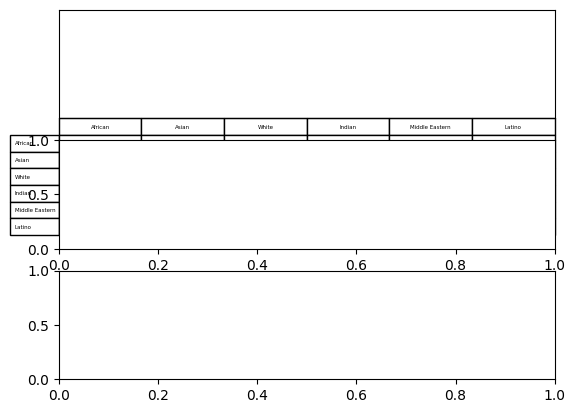

In [78]:
from pandas.plotting import table

fig, (ax1, ax2, ax3) = plt.subplots(3, 1)

# ax1 = plt.subplot(111, frame_on=False) # no visible frame
ax1.xaxis.set_visible(False)  # hide the x axis
ax1.yaxis.set_visible(False)  # hide the y axis
table(ax1, dem_parity_df)  # where df is your data frame
plt.savefig('dem_parity_df.png')

In [ ]:
for emotion in emotions:
  dem_par_white=0
  for race in races:
    dem_par_white+=dem_parity(sfew_result_non_dann, "White", race , emotion)
  print(emotion, ": ", dem_par_white/len(races))

Angry :  1.008951239866475
Fear :  1.157266692409842
Disgust :  1.1945091656511713
Sad :  1.1117574581180256
Surprise :  0.718008266192487
Neutral :  1.2490655446635173
Happy :  1.0645091732807985


In [ ]:
for emotion in emotions:
  dem_par_white=0
  for race in races:
    dem_par_white+=dem_parity(sfew_result_dann, "White", race , emotion)
  print(emotion, ": ", dem_par_white/len(races))

Angry :  1.1065374982074068
Fear :  1.0586146640107543
Disgust :  1.2889039593968565
Sad :  0.8713302547206019
Surprise :  0.8504041013425262
Neutral :  1.1914193336043832
Happy :  1.0635476229881446


In [ ]:
for emotion in emotions:
  dem_par_white=0
  for race in races:
    dem_par_white+=dem_parity(sfew_result_ewc_dann, "White", race , emotion)
  print(emotion, ": ", dem_par_white/len(races))

Angry :  1.1030549443328832
Fear :  1.0590656828967802
Disgust :  1.2908070765222033
Sad :  0.9134371827421367
Surprise :  0.8553736072246662
Neutral :  1.0337107952378408
Happy :  1.0422885995161564


In [ ]:
tot_emotion=0
for emotion in emotions:
  dem_par_white=0
  for race in races:
    dem_par_white+=dem_parity(sfew_result_non_dann, "Indian", race , emotion)
  print(emotion, ": ", dem_par_white/len(races))
  tot_emotion+=dem_par_white/len(races)
print("Avg emotion: ", tot_emotion/len(emotions))

Angry :  1.0040648299609056
Fear :  1.0592724544715217
Disgust :  0.9548126129534708
Sad :  1.1393698213615113
Surprise :  0.9531427364130961
Neutral :  1.8337885113613437
Happy :  0.9850043396545143
Avg emotion:  1.1327793294537662


In [ ]:
tot_emotion=0
for emotion in emotions:
  dem_par_white=0
  for race in races:
    dem_par_white+=dem_parity(sfew_result_dann, "Indian", race , emotion)
  print(emotion, ": ", dem_par_white/len(races))
  tot_emotion+=dem_par_white/len(races)
print("Avg emotion: ", tot_emotion/len(emotions))

Angry :  0.9429261005838789
Fear :  1.4653309543354398
Disgust :  1.1567369542438948
Sad :  1.0332769224719673
Surprise :  1.0552456967421897
Neutral :  1.5425087260855126
Happy :  0.9961979142939894
Avg emotion:  1.1703176098224104


In [ ]:
tot_emotion=0
for emotion in emotions:
  dem_par_white=0
  for race in races:
    dem_par_white+=dem_parity(sfew_result_ewc_dann, "Indian", race , emotion)
  print(emotion, ": ", dem_par_white/len(races))
  tot_emotion+=dem_par_white/len(races)
print("Avg emotion: ", tot_emotion/len(emotions))

Angry :  1.024411594939205
Fear :  1.4266561599080638
Disgust :  1.1424110818694675
Sad :  1.0281968819278784
Surprise :  0.9413210224088896
Neutral :  1.500970209112728
Happy :  0.9926634120524769
Avg emotion:  1.1509471946026726


In [ ]:
dem_parity(sfew_result_non_dann, "White", "Indian" , "Sad")

0.9757652320381018

In [ ]:
dem_parity(sfew_result_dann, "White", "Indian" , "Sad")

0.84326886217111

In [ ]:
dem_parity(sfew_result_ewc_dann, "White", "Indian" , "Sad")

0.8883874273470213

In [ ]:
dem_parity(sfew_result_non_dann, "White", "Asian" , "Sad")

0.9396773846729913

In [ ]:
dem_parity(sfew_result_dann, "White", "Asian" , "Sad")

0.9246080469411655

In [ ]:
dem_parity(sfew_result_ewc_dann, "White", "Asian" , "Sad")

0.9349002030307318